<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Recognization_Lane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Edge Detection


In [3]:
from google.colab import files
files.upload()

Saving car3.jpeg to car3.jpeg


{'car3.jpeg': b'\xff\xd8\xff\xdb\x00\x84\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\x1c\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x8

In [1]:
import math
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

In [26]:
file_name = 'car3.jpeg'
frame = cv.imread(file_name)
gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
height, width, channels = frame.shape
print(height, width)

540 960


In [27]:
#Gaussian Bklur for reducing noise
blur = cv.GaussianBlur(gray, (5,5), 0)

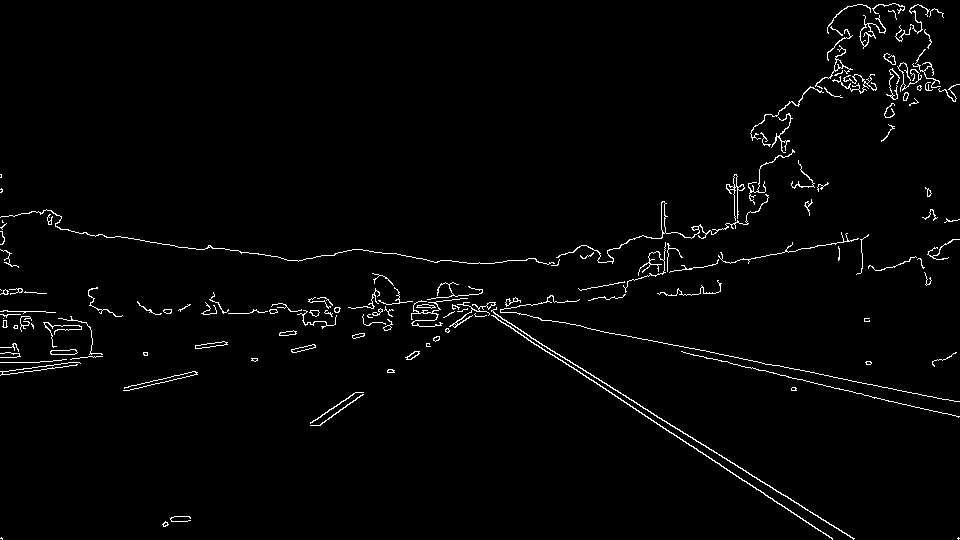

In [28]:
canny = cv.Canny(blur, 40, 130)
cv_imshow(canny)

#Region of Interest

In [29]:
mask = np.zeros(frame.shape[:2], dtype='uint8')

In [30]:
poly_height = int(0.60*height)
poly_left = int(0.47*width)
poly_right = int(0.53*width)
polygons = np.array([[(0,height), (poly_left,poly_height), (poly_right, poly_height), (width,height)]])
cv.fillPoly(mask, polygons, 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0]], dtype=uint8)

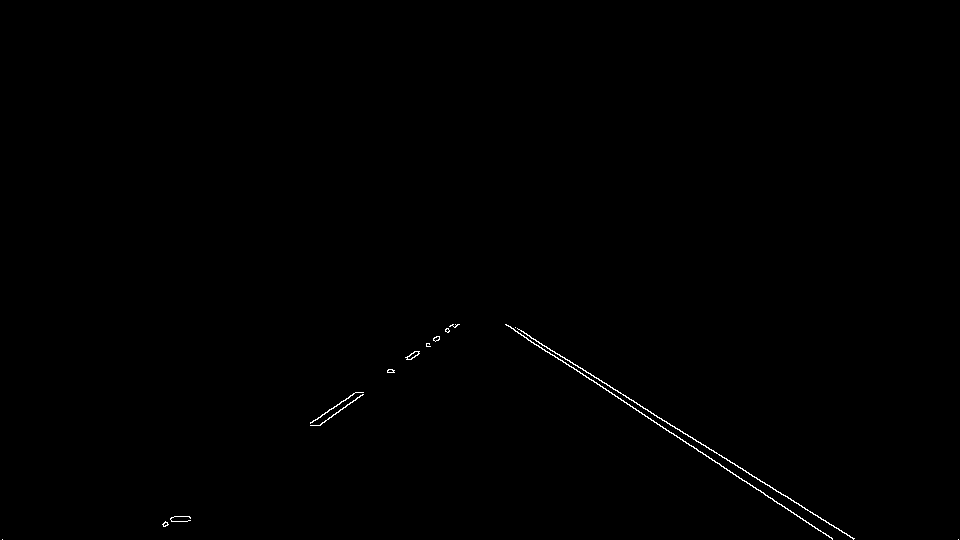

In [31]:
#bitwise operation between poly and mask
masked = cv.bitwise_and(canny, mask) 
cv_imshow(masked)

#Lane Detection

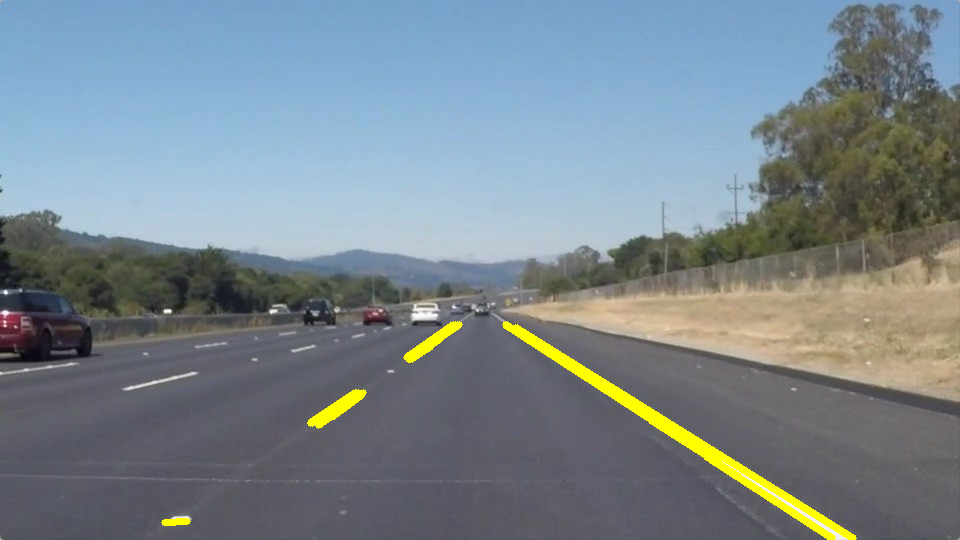

In [34]:
lines = cv.HoughLinesP(masked, 2, np.pi/180, 20, np.array([]), 20, 10)
RGBimage = cv.cvtColor(canny, cv.COLOR_GRAY2RGB)

for line in lines:
  for x1, y1, x2, y2 in line:
    cv.line(frame, (x1,y1),(x2,y2), (0,255,255), 5)
cv_imshow(frame)